In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [2]:
# Load dataset
df=pd.read_csv("bank.csv")
df.head()

NAME   age         job  marital  education default  balance housing  \
0  GERALDINE  59.0      admin.  married  secondary      no     2343     yes   
1        GIA  56.0      admin.  married  secondary      no       45      no   
2     GIANNA  41.0  technician  married  secondary      no     1270     yes   
3    GISELLE  55.0    services  married  secondary      no     2476     yes   
4      GRACE  54.0      admin.  married   tertiary      no      184      no   

  loan  contact  day month  duration  campaign  pdays  Branch   previous  \
0   no  unknown  5.0   may      1042       1.0   -1.0  Airoli        0.0   
1   no  unknown  5.0   may      1467       1.0   -1.0  Airoli        0.0   
2   no  unknown  5.0   may      1389       1.0   -1.0  Airoli        0.0   
3   no  unknown  5.0   may       579       1.0   -1.0  Airoli        0.0   
4   no  unknown  5.0   may       673       2.0   -1.0  Airoli        0.0   

  poutcome deposit  
0  unknown     yes  
1  unknown     yes  
2  unknown     yes  
3  unknown     yes  
4  unknown     yes

In [3]:
#check columns
df.columns

Index(['NAME', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'Branch ', 'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
#data dimension
df.shape

(11166, 19)

In [5]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       11164 non-null  object 
 1   age        11165 non-null  float64
 2   job        11166 non-null  object 
 3   marital    11166 non-null  object 
 4   education  11164 non-null  object 
 5   default    11166 non-null  object 
 6   balance    11166 non-null  int64  
 7   housing    11166 non-null  object 
 8   loan       11165 non-null  object 
 9   contact    11163 non-null  object 
 10  day        11162 non-null  float64
 11  month      11166 non-null  object 
 12  duration   11166 non-null  int64  
 13  campaign   11163 non-null  float64
 14  pdays      11164 non-null  float64
 15  Branch     11164 non-null  object 
 16  previous   11164 non-null  float64
 17  poutcome   11163 non-null  object 
 18  deposit    11166 non-null  object 
dtypes: float64(5), int64(2), object(12)
memory usa

# Data Preprocessing & Visualization

In [6]:
#Target variable distribution
#From the distribution of Target variable: "is_success" it is found that data is not imbalanced becouse there is approx 
#53% 'no' and 47% is 'yes'.
count = df.groupby('deposit').size()
percent = count/len(df)*100
print(percent)


deposit
no     52.632993
yes    47.367007
dtype: float64


In [7]:
#check for any missing values
df.isna().sum()

NAME         2
age          1
job          0
marital      0
education    2
default      0
balance      0
housing      0
loan         1
contact      3
day          4
month        0
duration     0
campaign     3
pdays        2
Branch       2
previous     2
poutcome     3
deposit      0
dtype: int64

In [8]:
#removing the missing value rows from dataset
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.shape

(11158, 19)

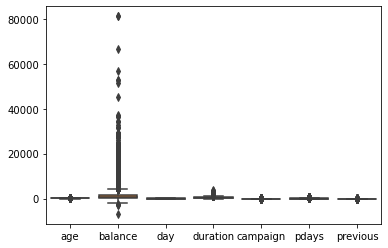

In [9]:
#outlier detection
sns.boxplot(data=df)

In [10]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [11]:
#lets see statistic of Numerical variables before Outlier treatment
df.describe()

age       balance           day      duration      campaign  \
count  11158.000000  11158.000000  11158.000000  11158.000000  11158.000000   
mean      41.233913   1528.666965     15.659168    372.025721      2.508962   
std       11.913981   3225.938429      8.421031    347.186503      2.722415   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11158.000000  11158.000000  
mean      51.349167      0.832855  
std      108.773262      2.292364  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       21.000000      1.000000  
max      854.000000     58.000000

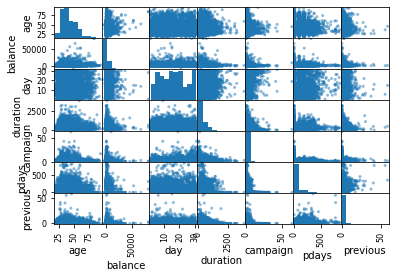

In [12]:
# scatter plot matrix to visualise outlier
scatter_matrix(df)
plt.show()

Scatter plot matrix showing that there is no strong relationship between these indepedent variables (no multicollinearity among these).
Lets analyze all Independent Numerical variables against Target variable 'is_success' by plotting Boxplot. 
We can easily find outliers through Boxplot.

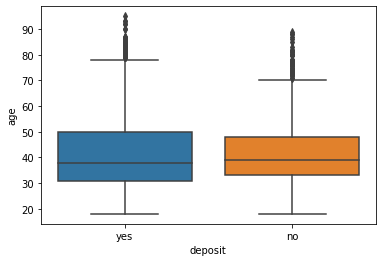

In [13]:
# age
sns.boxplot(x='deposit', y='age', data=df)

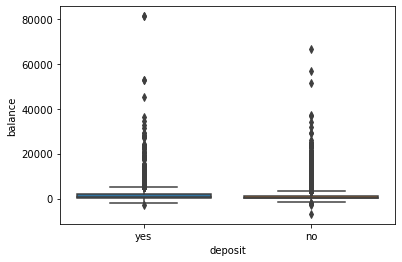

In [14]:
# balance
sns.boxplot(x='deposit', y='balance', data=df)

In [15]:
# Fixing outliers in balance column
df_new = df
min_val = df_new["balance"].min()
max_val = 20000
df_new = impute_outliers(df=df_new, column='balance' , minimum=min_val, maximum=max_val)

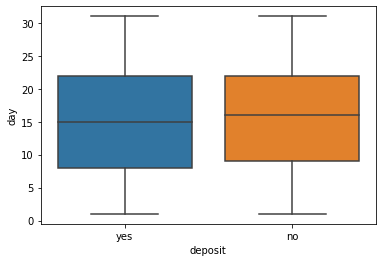

In [16]:
# day
sns.boxplot(x='deposit', y='day', data=df)

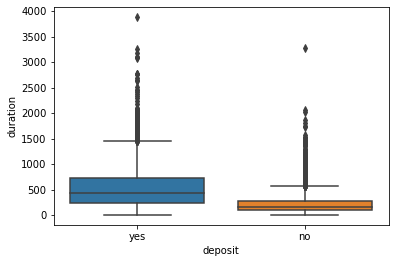

In [17]:
# duration
sns.boxplot(x='deposit', y='duration', data=df)

In [18]:
# Fixing outliers in duration column
min_val = df_new["duration"].min()
max_val = 2000
df_new = impute_outliers(df=df_new, column='duration' , minimum=min_val, maximum=max_val)

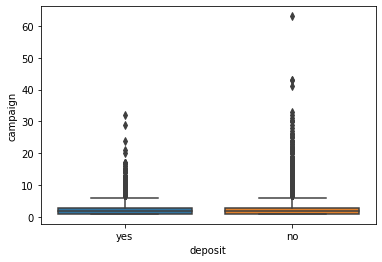

In [19]:
# campaign
sns.boxplot(x='deposit', y='campaign', data=df)

In [20]:
# Fixing outliers in duration column
min_val = df_new["duration"].min()
max_val = 20
df_new = impute_outliers(df=df_new, column='duration' , minimum=min_val, maximum=max_val)

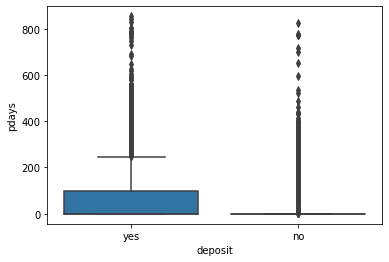

In [21]:
# pdays
sns.boxplot(x='deposit', y='pdays', data=df)

In [22]:
# Fixing pdays column
min_val = df_new["pdays"].min()
max_val = 250
df_new = impute_outliers(df=df_new, column='pdays' , minimum=min_val, maximum=max_val)

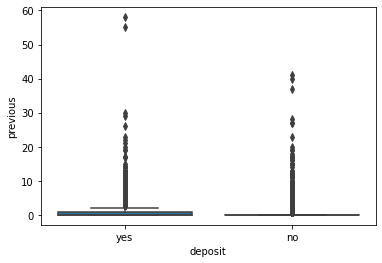

In [23]:
# previous
sns.boxplot(x='deposit', y='previous', data=df)

In [24]:
# Fixing outlier in 'previous' column
min_val = df_new["previous"].min()
max_val = 15
df_new = impute_outliers(df=df_new, column='previous' , minimum=min_val, maximum=max_val)

In [25]:
#lets see statistic of Numerical variables after Outlier treatment
df_new.describe()

age       balance           day      duration      campaign  \
count  11158.000000  11158.000000  11158.000000  11158.000000  11158.000000   
mean      41.233913   1380.199948     15.659168    359.397798      2.508962   
std       11.913981   2254.006314      8.421031     46.733694      2.722415   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    365.694555      1.000000   
50%       39.000000    550.000000     15.000000    365.694555      2.000000   
75%       49.000000   1663.500000     22.000000    365.694555      3.000000   
max       95.000000  19447.000000     31.000000    365.694555     63.000000   

              pdays      previous  
count  11158.000000  11158.000000  
mean      27.130351      0.760186  
std       56.597785      1.796426  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       21.000000      1.000000  
max      250.000000     15.000000

Now the data seems quite stable comparision to original.

Note:
1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.

In [26]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

job
admin.           11.955548
blue-collar      17.404553
entrepreneur      2.939595
housemaid         2.455637
management       22.996953
retired           6.972576
self-employed     3.629683
services          8.254167
student           3.226385
technician       16.338053
unemployed        3.199498
unknown           0.627353
dtype: float64


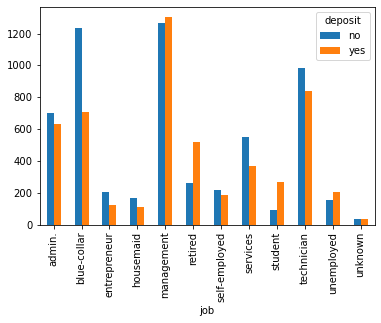

In [27]:
# job
temp1 = pd.crosstab(df['job'], df['deposit'])
temp1.plot(kind='bar')
print(df.groupby(['job']).size()/len(df)*100)

In [28]:
# Fixing 'job' column
df_new = impute_unknowns(df=df_new, column='job')


marital
divorced    11.579136
married     56.900878
single      31.519986
dtype: float64


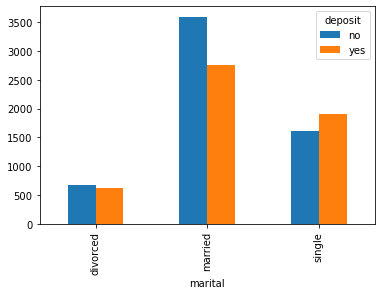

In [29]:
# marital
temp2 = pd.crosstab(df['marital'], df['deposit'])
temp2.plot(kind='bar')
print(df.groupby(['marital']).size()/len(df)*100)

education
primary      13.443269
secondary    49.058971
tertiary     33.061481
unknown       4.436279
dtype: float64


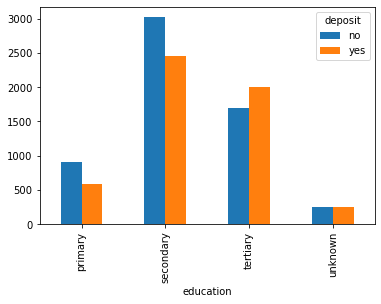

In [30]:
# education
temp3 = pd.crosstab(df['education'], df['deposit'])
temp3.plot(kind='bar')
print(df.groupby(['education']).size()/len(df)*100)

In [31]:
# Fixing 'education' column
df_new = impute_unknowns(df=df_new, column='education')

default
no     98.494354
yes     1.505646
dtype: float64


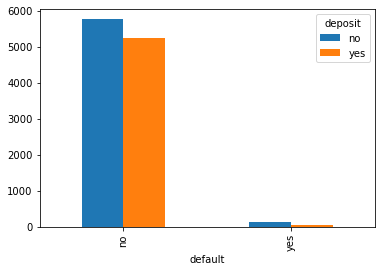

In [32]:
# default
temp3 = pd.crosstab(df['default'], df['deposit'])
temp3.plot(kind='bar')
print(df.groupby(['default']).size()/len(df)*100)

This variable looks highly imbalanced so will drop it

In [33]:
#dropping variable 'default'
del df_new['default']

housing
no     52.697616
yes    47.302384
dtype: float64


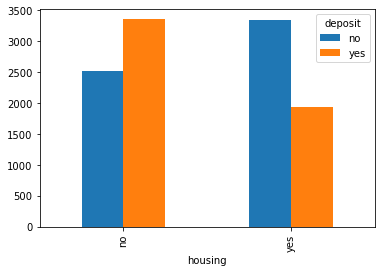

In [34]:
# housing
temp5 = pd.crosstab(df['housing'], df['deposit'])
temp5.plot(kind='bar')
print(df.groupby(['housing']).size()/len(df)*100)

contact
cellular     72.046962
telephone     6.936727
unknown      21.016311
dtype: float64


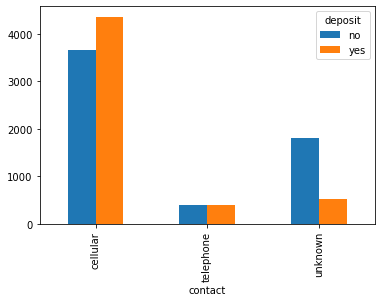

In [35]:
# "contact"
temp6 = pd.crosstab(df['contact'], df['deposit'])
temp6.plot(kind='bar')
print(df.groupby(['contact']).size()/len(df)*100)

In [36]:
# Fixing 'contact' column
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del df_new['contact']

month
apr     8.272092
aug    13.613551
dec     0.985840
feb     6.945689
jan     3.082990
jul    13.568740
jun    10.942821
mar     2.473562
may    25.291271
nov     8.451335
oct     3.513174
sep     2.858935
dtype: float64


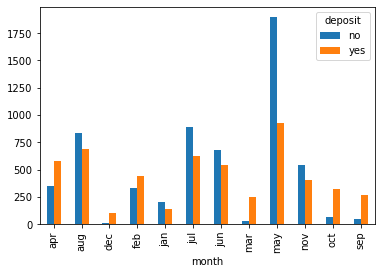

In [37]:
# "month"
temp7 = pd.crosstab(df['month'], df['deposit'])
temp7.plot(kind='bar')
print(df.groupby(['month']).size()/len(df)*100)

poutcome
failure    11.005557
other       4.812690
success     9.598494
unknown    74.583259
dtype: float64


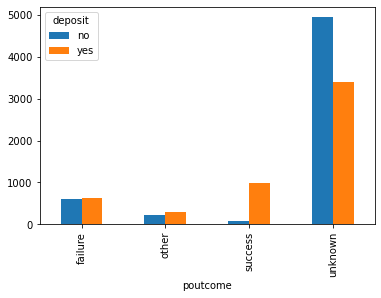

In [38]:
# "poutcome"
temp8 = pd.crosstab(df['poutcome'], df['deposit'])
temp8.plot(kind='bar')
print(df.groupby(['poutcome']).size()/len(df)*100)

In [39]:
#poutcome" also have more than 74% missing values so we can drop this variable also.
#dropping variable 'poutcome'
del df_new['poutcome']

loan
no     86.933142
yes    13.066858
dtype: float64


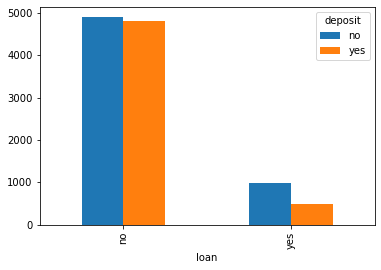

In [40]:
# "loan"
temp9 = pd.crosstab(df['loan'], df['deposit'])
temp9.plot(kind='bar')
print(df.groupby(['loan']).size()/len(df)*100)

Branch 
Airoli     100.0
dtype: float64


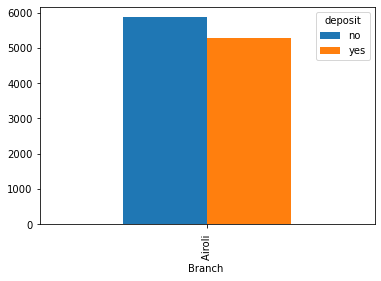

In [41]:
# Branch
temp1 = pd.crosstab(df['Branch '], df['deposit'])
temp1.plot(kind='bar')
print(df.groupby(['Branch ']).size()/len(df)*100)

In [42]:
#dropping variable 'NAME' because it is of no use in prediction.
del df_new['NAME']

In [43]:
#Updated Dataset after Exploratary Data Analysis:
df_new.head()

age         job  marital  education  balance housing loan  day month  \
0  59.0      admin.  married  secondary   2343.0     yes   no  5.0   may   
1  56.0      admin.  married  secondary     45.0      no   no  5.0   may   
2  41.0  technician  married  secondary   1270.0     yes   no  5.0   may   
3  55.0    services  married  secondary   2476.0     yes   no  5.0   may   
4  54.0      admin.  married   tertiary    184.0      no   no  5.0   may   

     duration  campaign  pdays  Branch   previous deposit  
0  365.694555       1.0   -1.0  Airoli        0.0     yes  
1  365.694555       1.0   -1.0  Airoli        0.0     yes  
2  365.694555       1.0   -1.0  Airoli        0.0     yes  
3  365.694555       1.0   -1.0  Airoli        0.0     yes  
4  365.694555       2.0   -1.0  Airoli        0.0     yes

Now total variables are 16 because we have removed 3 categorical variables.

# Data Transformation - Encoding Categorical data

In [44]:
# Convert target variable into numeric
df_new.deposit = df_new.deposit.map({'no':0, 'yes':1}).astype('uint8')

In [45]:
#changing categorical variable to numerical variable
df_new[['housing','loan']]=df_new[['housing','loan']].replace(["yes","no"],["1","0"])
df_new['month']=df_new['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df_new['job']=df_new['job'].replace(['unknown'],['other'])

df_new.head()

age         job  marital  education  balance housing loan  day month  \
0  59.0      admin.  married  secondary   2343.0       1    0  5.0     5   
1  56.0      admin.  married  secondary     45.0       0    0  5.0     5   
2  41.0  technician  married  secondary   1270.0       1    0  5.0     5   
3  55.0    services  married  secondary   2476.0       1    0  5.0     5   
4  54.0      admin.  married   tertiary    184.0       0    0  5.0     5   

     duration  campaign  pdays  Branch   previous  deposit  
0  365.694555       1.0   -1.0  Airoli        0.0        1  
1  365.694555       1.0   -1.0  Airoli        0.0        1  
2  365.694555       1.0   -1.0  Airoli        0.0        1  
3  365.694555       1.0   -1.0  Airoli        0.0        1  
4  365.694555       2.0   -1.0  Airoli        0.0        1

In [46]:
#Label Encoding of features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['job']=le.fit_transform(df['job'])
df_new['education']=le.fit_transform(df['education'])
df_new['marital']=le.fit_transform(df['marital'])
#droping branch because of no use in modeling
df.drop(['Branch '],axis=1, inplace=True)
df_new.head()

age  job  marital  education  balance housing loan  day month    duration  \
0  59.0    0        1          1   2343.0       1    0  5.0     5  365.694555   
1  56.0    0        1          1     45.0       0    0  5.0     5  365.694555   
2  41.0    9        1          1   1270.0       1    0  5.0     5  365.694555   
3  55.0    7        1          1   2476.0       1    0  5.0     5  365.694555   
4  54.0    0        1          2    184.0       0    0  5.0     5  365.694555   

   campaign  pdays  previous  deposit  
0       1.0   -1.0       0.0        1  
1       1.0   -1.0       0.0        1  
2       1.0   -1.0       0.0        1  
3       1.0   -1.0       0.0        1  
4       2.0   -1.0       0.0        1

# Correlation Matrix

In [47]:
corr=df_new.corr()
corr

age       job   marital  education   balance       day  \
age        1.000000 -0.038483 -0.442796  -0.193553  0.103645 -0.000712   
job       -0.038483  1.000000  0.078528   0.145423  0.039126  0.027515   
marital   -0.442796  0.078528  1.000000   0.141174  0.004977 -0.003908   
education -0.193553  0.145423  0.141174   1.000000  0.057586  0.011115   
balance    0.103645  0.039126  0.004977   0.057586  1.000000  0.015677   
day       -0.000712  0.027515 -0.003908   0.011115  0.015677  1.000000   
duration   0.012332  0.016384 -0.008056   0.031062  0.010706 -0.025163   
campaign  -0.005370  0.001712 -0.030867  -0.014372 -0.021918  0.136960   
pdays      0.046369  0.036494  0.033350   0.071386  0.070037 -0.044075   
previous   0.037279  0.014614  0.029227   0.051292  0.041972 -0.057294   
deposit    0.034754  0.063868  0.067529   0.100965  0.107404 -0.056471   

           duration  campaign     pdays  previous   deposit  
age        0.012332 -0.005370  0.046369  0.037279  0.034754  
job        0.016384  0.001712  0.036494  0.014614  0.063868  
marital   -0.008056 -0.030867  0.033350  0.029227  0.067529  
education  0.031062 -0.014372  0.071386  0.051292  0.100965  
balance    0.010706 -0.021918  0.070037  0.041972  0.107404  
day       -0.025163  0.136960 -0.044075 -0.057294 -0.056471  
duration   1.000000 -0.222487  0.022290  0.005855  0.125176  
campaign  -0.222487  1.000000 -0.109721 -0.072610 -0.128297  
pdays      0.022290 -0.109721  1.000000  0.635239  0.218094  
previous   0.005855 -0.072610  0.635239  1.000000  0.180655  
deposit    0.125176 -0.128297  0.218094  0.180655  1.000000

In [48]:
print(corr['deposit'].sort_values(ascending=False))

deposit      1.000000
pdays        0.218094
previous     0.180655
duration     0.125176
balance      0.107404
education    0.100965
marital      0.067529
job          0.063868
age          0.034754
day         -0.056471
campaign    -0.128297
Name: deposit, dtype: float64


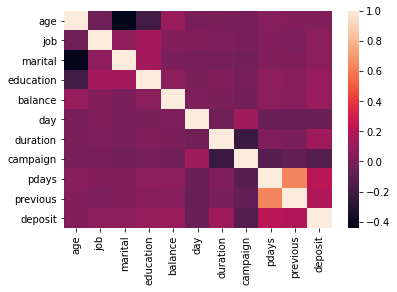

In [49]:
#Corelation visual
sns.heatmap(df_new.corr())
plt.show()

# Feature Engineering

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

feature_columns=['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
X = df_new[feature_columns]
Y=df_new['deposit']

#Splitting the dataset into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=1)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(8926, 13) (2232, 13) (8926,) (2232,)


In [51]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Building, Prediction & Evaluation

In [68]:
#Logistic Regression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#Evaluation
print(accuracy_score(Y_pred, Y_test))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.6612903225806451
[[819 352]
 [404 657]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1171
           1       0.65      0.62      0.63      1061

    accuracy                           0.66      2232
   macro avg       0.66      0.66      0.66      2232
weighted avg       0.66      0.66      0.66      2232



In [71]:
# Decision tree model
from sklearn.tree import DecisionTreeRegressor  
#create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
reg_pred = regressor.predict(X_test)
#Evaluation
print(accuracy_score(Y_test, reg_pred))
print(confusion_matrix(Y_test, reg_pred))
print(classification_report(Y_test, reg_pred))

0.6384408602150538
[[791 380]
 [427 634]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1171
           1       0.63      0.60      0.61      1061

    accuracy                           0.64      2232
   macro avg       0.64      0.64      0.64      2232
weighted avg       0.64      0.64      0.64      2232



In [72]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predict = rfc.predict(X_test)
#Evaluation
print(accuracy_score(Y_test, predict))
print(confusion_matrix(Y_test, predict))
print(classification_report(Y_test,predict))

0.7114695340501792
[[940 231]
 [413 648]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1171
           1       0.74      0.61      0.67      1061

    accuracy                           0.71      2232
   macro avg       0.72      0.71      0.71      2232
weighted avg       0.71      0.71      0.71      2232



In [73]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
#Evaluation
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test,pred))

0.6854838709677419
[[937 234]
 [468 593]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1171
           1       0.72      0.56      0.63      1061

    accuracy                           0.69      2232
   macro avg       0.69      0.68      0.68      2232
weighted avg       0.69      0.69      0.68      2232



In [74]:
#parameter Tuning with Gridsearchcv
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train,Y_train)
Pred_gb = gsearch.predict(X_test)
#Evaluation
print(accuracy_score(Y_test, Pred_gb))
print(confusion_matrix(Y_test, Pred_gb))
print(classification_report(Y_test,Pred_gb))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


0.717741935483871
[[977 194]
 [436 625]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      1171
           1       0.76      0.59      0.66      1061

    accuracy                           0.72      2232
   macro avg       0.73      0.71      0.71      2232
weighted avg       0.73      0.72      0.71      2232



As per Accuracy Random Forest & XGboost with gridsearch are better algorithms for this data
than Logistic regression and Support vector Machine.

In [59]:
#Compare Actual and predicted values:
dff= pd.DataFrame({'Actual': Y_test,'Predicted': Pred_gb})
dff.head()

Actual  Predicted
2245       1          1
7237       0          0
4019       1          1
7820       0          0
7667       0          1

Here One denotes Yes and 0 denotes No for the Deposit-status.

In [64]:
# Saving Prediction Result file in CSV format.
dff.to_csv("Result.csv")